# Figure 1: Response vs Next Response plot

## Settings

Decide on the following:
* Which dataset to plot (e.g. `olist_brazilian_ecommerce_customer_order_view`, `olist_brazilian_ecommerce_customer_order_item_view`, `uci_online_retail_ii_customer_order_view`, `uci_online_retail_ii_customer_order_item_view`)
* Which response column's value we are using (e.g. `r_BasketValue`, `r_BasketSize`, `r_SellingPrice`), make sure your dataset contains the response column, or else the code will throw an error
* Whether one should normalize the value in the response column by its mean
* The size (in inches) of the figures generated

In [1]:
dataset_name = 'olist_brazilian_ecommerce_customer_order_view'
# dataset_name = 'uci_online_retail_ii_customer_order_view'

response_col = 'r_BasketValue'
# response_col = 'r_BasketSize'

normalize = True
figsize = 2

------

In [2]:
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

from oce_ecomm_abv_calculation.datasets.default_datasets import get_default_dataset_by_name
from oce_ecomm_abv_calculation.plots.response_vs_next_response import (
    append_next_analysis_unit_under_same_randomization_unit, 
    randomly_shuffle_next_analysis_unit_rows,
    get_plot_params, 
    next_col_name,
    output_file_path,
    hist_zoomed_out_plot,
    hist_zoomed_in_plot,
    kde_plot
)

In [3]:
plot_params = get_plot_params(dataset_name=dataset_name, 
                              response_col=response_col,
                              normalize=normalize)

dataset_df = (
    append_next_analysis_unit_under_same_randomization_unit(
        get_default_dataset_by_name(dataset_name),
        normalize_response_cols=normalize
    )
)

plot_dataset_df = dataset_df[dataset_df[next_col_name("AnalysisUnitId")].notnull()]

val_pearson_r = pearsonr(plot_dataset_df[response_col], plot_dataset_df[next_col_name(response_col)])
val_spearman_r = spearmanr(plot_dataset_df[response_col], plot_dataset_df[next_col_name(response_col)])

print(f"Pearson's correlation coefficient & p-value: {val_pearson_r}")
print(f"Spearman's correlation coefficient & p-value: {val_spearman_r}")

Pearson's correlation coefficient: 0.2661976168635988
Spearman's correlation coefficient: 0.3897006749690403


## 2-D histogram

Showing the both the marginal and joint distributions between the value/size of a transaction and the next transaction (if any) made by the same user.

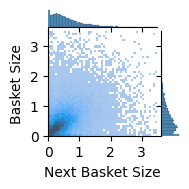

In [4]:
dark_rayfish_plot = (
    hist_zoomed_out_plot(
        plot_dataset_df=plot_dataset_df,
        plot_params=plot_params,
        response_col=response_col,
        size=figsize
    )
)

if normalize:
    if ("olist" in dataset_name) and (response_col == "r_BasketSize"):
        dark_rayfish_plot.ax_joint.set(xticks=[0,2,4,6], yticks=[0,2,4,6])
    else:
        dark_rayfish_plot.ax_joint.set(xticks=[0,1,2,3], yticks=[0,1,2,3])

dark_rayfish_plot.savefig(
    output_file_path(dataset_name, response_col, normalize, plot_type="histzout")
)

## Zoomed-in 2-D Histogram

Showing the high joint density region.

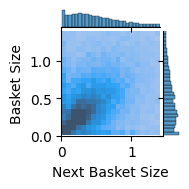

In [5]:
dark_rayfish_baby_plot = (
    hist_zoomed_in_plot(
        plot_dataset_df=plot_dataset_df,
        plot_params=plot_params,
        response_col=response_col,
        size=figsize
    )
)

dark_rayfish_baby_plot.savefig(
    output_file_path(dataset_name, response_col, normalize, plot_type="histzin")
)

## Kernel Density Estimation (KDE) Plot

Around 10% of the data points lie betwen two successive contours.

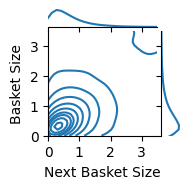

In [6]:
light_rayfish_plot = (
    kde_plot(
        plot_dataset_df=plot_dataset_df,
        plot_params=plot_params,
        response_col=response_col,
        size=figsize
    )
)

if normalize:
    if ("olist" in dataset_name) and (response_col == "r_BasketSize"):
        light_rayfish_plot.ax_joint.set(xticks=[0,2,4,6], yticks=[0,2,4,6])
    else:
        light_rayfish_plot.ax_joint.set(xticks=[0,1,2,3], yticks=[0,1,2,3])

light_rayfish_plot.savefig(
    output_file_path(dataset_name, response_col, normalize, plot_type="kde")
)

## What if the responses are independent?

The plots above show a response is positively correlated to the next response from the same user. We are also interested in how the plots would look if the responses were independent.

To achieve so, we pair a response with a randomly selected response in the dataset (instead of the next response from the same user). We also ensure the marginal distribution of the responses is the same as in the plots above. This is achieved by taking the original response-next response mapping dataframe obtained above, fixing the original response-related columns, and randomly shuffling (without replacement) the rows of the next response-related columns.

The `rnr` designation stands for "random next response".

In [7]:
plot_rnr_dataset_df = randomly_shuffle_next_analysis_unit_rows(plot_dataset_df)

val_rnr_pearson_r = pearsonr(plot_rnr_dataset_df[response_col], 
                             plot_rnr_dataset_df[next_col_name(response_col)])
val_rnr_spearman_r = spearmanr(plot_rnr_dataset_df[response_col], 
                               plot_rnr_dataset_df[next_col_name(response_col)])

print(f"Pearson's correlation coefficient & p-value: {val_rnr_pearson_r}")
print(f"Spearman's correlation coefficient & p-value: {val_rnr_spearman_r}")

Pearson's correlation coefficient: -0.0012316661549327387
Spearman's correlation coefficient: 0.0010107815354063764


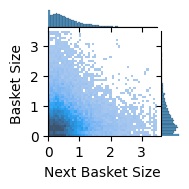

In [8]:
dark_rnr_rayfish_plot = (
    hist_zoomed_out_plot(
        plot_dataset_df=plot_rnr_dataset_df,
        plot_params=plot_params,
        response_col=response_col,
        size=figsize
    )
)

if normalize:
    if ("olist" in dataset_name) and (response_col == "r_BasketSize"):
        dark_rnr_rayfish_plot.ax_joint.set(xticks=[0,2,4,6], yticks=[0,2,4,6])
    else:
        dark_rnr_rayfish_plot.ax_joint.set(xticks=[0,1,2,3], yticks=[0,1,2,3])

dark_rnr_rayfish_plot.savefig(
    output_file_path(dataset_name, response_col, normalize, plot_type="histzout_rnr")
)

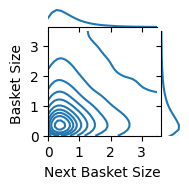

In [9]:
light_rnr_rayfish_plot = (
    kde_plot(
        plot_dataset_df=plot_rnr_dataset_df,
        plot_params=plot_params,
        response_col=response_col,
        size=figsize
    )
)

if normalize:
    if ("olist" in dataset_name) and (response_col == "r_BasketSize"):
        light_rnr_rayfish_plot.ax_joint.set(xticks=[0,2,4,6], yticks=[0,2,4,6])
    else:
        light_rnr_rayfish_plot.ax_joint.set(xticks=[0,1,2,3], yticks=[0,1,2,3])

light_rnr_rayfish_plot.savefig(
    output_file_path(dataset_name, response_col, normalize, plot_type="kde_rnr")
)